Кумакшев Феликс Владимирович; ТФэ-01-21


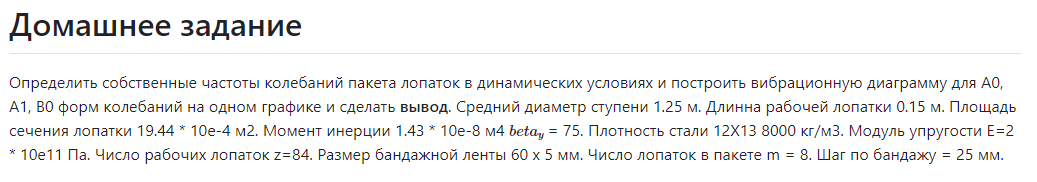

In [4]:
import numpy as np
import matplotlib.pyplot as plt

from functools import partial
from typing import Callable, List, Tuple, Union, Optional

from scipy.integrate import dblquad, quad

In [5]:
mm = 1e-3
MPa = 1e6
kW = 1e3
MW = 1e6

In [9]:
d = 1.25
l = 0.15
f = 19.44 * (10 ** (-4))
J = 1.43 * (10 ** (-8))
beta = 75
density = 8000
E = 2 * (10**11)
z=84
delta = 5 * mm
B = 60 * mm
m = 8
t = 25 * mm

In [10]:
i = (J / f) ** 0.5

_lambda = l / i
_lambda

55.30588810191244

In [11]:
psi = 0.98

In [12]:
def static_frequency(i):
    _m = {
        1: 0.56,
        2: 3.51,
        3: 9.82
 
    }
    first = psi * _m[i] / (l ** 2)
    second = ((E * J) / (density * f)) ** 0.5
    return first * second

In [13]:
static_frequency(1), static_frequency(2), static_frequency(3)

(330.7664691980739, 2073.196976580784, 5800.226299151937)

In [16]:
H = 0.12
J_b = B * (delta ** 3) / 12
J_b

6.250000000000001e-10

In [24]:
k = (12 * (m - 1) * H * E * J_b * l * np.sin(np.deg2rad(beta)) ** 2) / (m * t * J * E)
print("Коэффициент жесткости бандажа:", k)

Коэффициент жесткости бандажа: 0.30828566548536623


In [25]:
nu = B * delta * t / (f * l)
nu

0.025720164609053492

In [26]:
B_bandage = 0.5 * ((d/l) - 1) * ((nu+1/2)/(nu+1/3)) + np.sin(np.deg2rad(beta)) ** 2
B_bandage

6.301685099217912

In [27]:
def to_dynamic_frequency(f, n=50):
    root = (1 + B_bandage * (n / f) ** 2) ** 0.5
    return f * root

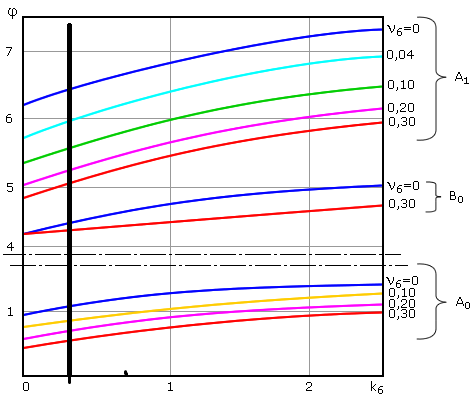

In [29]:
f_a0 = static_frequency(1) * 0.95
f_a1 = static_frequency(1) * 6.2
f_b0 = static_frequency(1) * 4.2

f_a0, f_a1, f_b0  # Hz

(314.22814573817016, 2050.752109028058, 1389.2191706319104)

In [30]:
to_dynamic_frequency(f_a0), to_dynamic_frequency(f_a1), to_dynamic_frequency(f_b0)

(338.3689411309695, 2054.5896002440663, 1394.8778142902904)

In [42]:
def min_max(f, delta=0.05):
    return f * (1-delta) , f * (1 + delta)

In [76]:
n_line = np.linspace(0, 70)
min_lineA0, max_lineA0 = min_max(to_dynamic_frequency(f_a0, n=n_line))
min_lineA1, max_lineA1 = min_max(to_dynamic_frequency(f_a1, n=n_line))
min_lineB0, max_lineB0 = min_max(to_dynamic_frequency(f_b0, n=n_line))

In [77]:
def k_line(k, n=n_line):
    return k * n_line

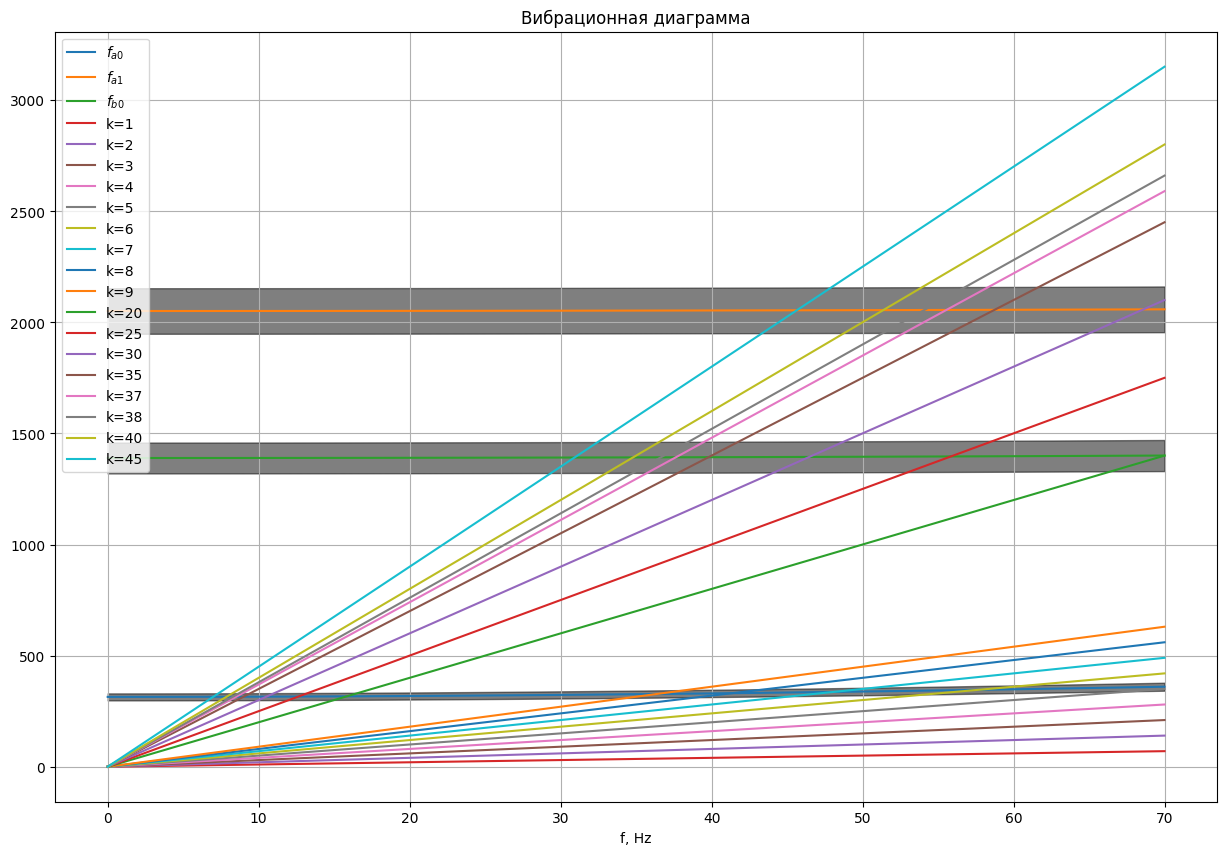

In [84]:
fig, ax = plt.subplots(1,1,figsize=(15,10))
ax.plot(n_line, to_dynamic_frequency(f_a0, n=n_line), label='$f_{a0}$')
ax.fill_between(n_line, y1=min_lineA0, y2=max_lineA0, alpha=0.5, color='Black')
ax.plot(n_line, to_dynamic_frequency(f_a1, n=n_line), label='$f_{a1}$')
ax.fill_between(n_line, y1=min_lineA1, y2=max_lineA1, alpha=0.5, color='Black')
ax.plot(n_line, to_dynamic_frequency(f_b0, n=n_line), label='$f_{b0}$')
ax.fill_between(n_line, y1=min_lineB0, y2=max_lineB0, alpha=0.5, color='Black')


ax.plot(n_line, k_line(1), label=f'k={1}')
ax.plot(n_line, k_line(2), label=f'k={2}')
ax.plot(n_line, k_line(3), label=f'k={3}')
ax.plot(n_line, k_line(4), label=f'k={4}')
ax.plot(n_line, k_line(5), label=f'k={5}')
ax.plot(n_line, k_line(6), label=f'k={6}')
ax.plot(n_line, k_line(7), label=f'k={7}')
ax.plot(n_line, k_line(8), label=f'k={8}')
ax.plot(n_line, k_line(9), label=f'k={9}')
ax.plot(n_line, k_line(20), label=f'k={20}')
ax.plot(n_line, k_line(25), label=f'k={25}')
ax.plot(n_line, k_line(30), label=f'k={30}')
ax.plot(n_line, k_line(35), label=f'k={35}')
ax.plot(n_line, k_line(37), label=f'k={37}')
ax.plot(n_line, k_line(38), label=f'k={38}')
ax.plot(n_line, k_line(40), label=f'k={40}')
ax.plot(n_line, k_line(45), label=f'k={45}')
ax.set_xlabel("n, rps")
ax.set_xlabel("f, Hz")
ax.grid()
ax.legend()
ax.set_title("Вибрационная диаграмма");

Вывод:
</br>
Опасные зоны работы лопаточного аппарата А0 при кратности: k = 6,7,8 - Действуют возмущающие силы первого порядка.
</br>
Опасные зоны работы лопаточного аппарата А1 при кратности: k = 37-45 - Действуют возмущающие силы первого порядка.
</br>
Опасные зоны работы лопаточного аппарата В0 при кратности: k = 25-30 - Действуют возмущающие силы первого порядка.